In [1]:
import numpy as np
import pandas as pd

In [2]:
resaleflat1 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
#resaleflat2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
resaleflat3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
resaleflat4 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
resaleflat = pd.concat((resaleflat1,resaleflat3,resaleflat4), axis=0, sort=True)

resaleflat_l = resaleflat.copy()
resaleflatview = resaleflat1.copy()

locations = pd.read_csv('street_to_MRT.csv')
locations = locations.drop('Unnamed: 0', axis=1)

In [3]:
resaleflat.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,406,Improved,2 ROOM,44.0,1979,2017-01,61 years 04 months,232000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
1,108,New Generation,3 ROOM,67.0,1978,2017-01,60 years 07 months,250000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
2,602,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,262000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO
3,465,New Generation,3 ROOM,68.0,1980,2017-01,62 years 01 month,265000.0,04 TO 06,ANG MO KIO AVE 10,ANG MO KIO
4,601,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,265000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO


In [4]:
locations.head()

,street_name,dist_nearestMRT
0,CIRCUIT RD,0.435332
1,JURONG EAST ST 21,0.567413
2,JURONG EAST ST 24,0.738477
3,JURONG EAST ST 21,0.884302
4,JURONG EAST ST 21,0.884302


In [5]:
locations = locations[-locations.duplicated(keep='first',subset='street_name')]

In [6]:
resaleflat_l = pd.merge(resaleflat,locations,how='left')

In [7]:
resaleflat_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139788 entries, 0 to 139787
Data columns (total 12 columns):
block                  139788 non-null object
flat_model             139788 non-null object
flat_type              139788 non-null object
floor_area_sqm         139788 non-null float64
lease_commence_date    139788 non-null int64
month                  139788 non-null object
remaining_lease        87585 non-null object
resale_price           139788 non-null float64
storey_range           139788 non-null object
street_name            139788 non-null object
town                   139788 non-null object
dist_nearestMRT        138819 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 13.9+ MB


In [8]:
resaleflat.isnull().sum()

#Remaining lease has a lot of null, need to fix

block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52203
resale_price               0
storey_range               0
street_name                0
town                       0
dtype: int64

In [9]:
resaleflat_l.describe()

,floor_area_sqm,lease_commence_date,resale_price,dist_nearestMRT
count,139788.000000,139788.000000,1.397880e+05,138819.000000
mean,97.048536,1991.237145,4.473022e+05,0.790981
std,24.518557,11.209949,1.385259e+05,0.440534
min,31.000000,1966.000000,1.600000e+05,0.035610
25%,74.000000,1984.000000,3.480000e+05,0.456600
50%,96.000000,1989.000000,4.200000e+05,0.660821
75%,112.000000,2000.000000,5.150000e+05,1.077458
max,280.000000,2016.000000,1.200000e+06,3.533475


In [10]:
#Input 75% percentile for dist_nearestMRT for missing values, assume that these streets are far away from MRT
resaleflat_l['dist_nearestMRT'] = resaleflat_l['dist_nearestMRT'].fillna(1.077)

#Distance to nearest MRT is alr normalized (0-3.53), dont need to normalize

# We had to convert categorical to numerical first to see correlations, now we redo the table using onehotencoding

In [11]:
resaleflat_l.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,dist_nearestMRT
0,406,Improved,2 ROOM,44.0,1979,2017-01,61 years 04 months,232000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,0.497407
1,108,New Generation,3 ROOM,67.0,1978,2017-01,60 years 07 months,250000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,1.697526
2,602,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,262000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO,0.752168
3,465,New Generation,3 ROOM,68.0,1980,2017-01,62 years 01 month,265000.0,04 TO 06,ANG MO KIO AVE 10,ANG MO KIO,0.497407
4,601,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,265000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO,0.752168


In [12]:
#Convert first two char into integer for years left
resaleflat_l['remaining_lease_year'] = resaleflat_l['remaining_lease'].str.slice(stop=2).astype('float')
#Substring/slice the month out
resaleflat_l['remaining_lease_month'] = resaleflat_l['remaining_lease'].str.slice(start=9,stop=12)

replacemonth = {}
replacemonth[''] = 0
replacemonth['0 m'] = 0
resaleflat_l['remaining_lease_month'] = resaleflat_l['remaining_lease_month'].replace(replacemonth)

resaleflat_l['remaining_lease_month'] = resaleflat_l['remaining_lease_month'].astype('float') / 12
resaleflat_l['remaining_lease'] = resaleflat_l['remaining_lease_year'] + resaleflat_l['remaining_lease_month']
resaleflat_l = resaleflat_l.drop(['remaining_lease_year','remaining_lease_month'], axis=1)

resaleflat_l.month = resaleflat_l.month.apply(lambda x: float(x[0:4])+float(x[5:7])/12)
#Inpute missing values with remaining lease (take current year-month minus the lease start year)
resaleflat_l.remaining_lease[resaleflat_l.remaining_lease.isnull()] = resaleflat_l['month'] - resaleflat_l['lease_commence_date']

stats = resaleflat_l.describe()

#Normalize the month, floor area and remaining lease (timeframe)
resaleflat_l.month = (resaleflat_l.month - resaleflat_l.month.mean()) / resaleflat_l.month.std()
resaleflat_l.floor_area_sqm = (resaleflat_l.floor_area_sqm - resaleflat_l.floor_area_sqm.mean()) / resaleflat_l.floor_area_sqm.std()
resaleflat_l.remaining_lease = (resaleflat_l.remaining_lease - resaleflat_l.remaining_lease.mean()) / resaleflat_l.remaining_lease.std()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
stats

,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,dist_nearestMRT
count,139788.000000,139788.000000,139788.000000,139788.000000,1.397880e+05,139788.000000
mean,97.048536,1991.237145,2015.904144,42.522339,4.473022e+05,0.792964
std,24.518557,11.209949,2.179811,26.483713,1.385259e+05,0.439645
min,31.000000,1966.000000,2012.250000,1.250000,1.600000e+05,0.035610
25%,74.000000,1984.000000,2013.916667,20.416667,3.480000e+05,0.459176
50%,96.000000,1989.000000,2016.000000,33.250000,4.200000e+05,0.668514
75%,112.000000,2000.000000,2017.833333,66.500000,5.150000e+05,1.077000
max,280.000000,2016.000000,2019.416667,96.666667,1.200000e+06,3.533475


In [14]:
#Blocks in Singapore is rather irregular and does not impact on the pricing
#Lease commence date is highly correlated with remaining lease as remaining lease = current date - lease commence date

#Use town instead of street_name for random forest, both are highly correlated so just use one

resaleflat_l = resaleflat_l.drop(columns=['block','lease_commence_date','street_name','flat_type'])

In [15]:
resaleflat_l.head()

,flat_model,floor_area_sqm,month,remaining_lease,resale_price,storey_range,town,dist_nearestMRT
0,Improved,-2.163608,0.540959,0.710285,232000.0,10 TO 12,ANG MO KIO,0.497407
1,New Generation,-1.225543,0.540959,0.681966,250000.0,01 TO 03,ANG MO KIO,1.697526
2,New Generation,-1.225543,0.540959,0.751191,262000.0,01 TO 03,ANG MO KIO,0.752168
3,New Generation,-1.184757,0.540959,0.738605,265000.0,04 TO 06,ANG MO KIO,0.497407
4,New Generation,-1.225543,0.540959,0.751191,265000.0,01 TO 03,ANG MO KIO,0.752168


In [16]:
#Check that no repeats for flat model
resaleflat_l.flat_model.unique()

array(['Improved', 'New Generation', 'Standard', 'DBSS', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', 'Premium Apartment.',
       '2-room'], dtype=object)

In [17]:
all_flat_model = pd.get_dummies(resaleflat_l['flat_model'], prefix='flt')
all_towns = pd.get_dummies(resaleflat_l['town'], prefix='st')

resaleflat_l = resaleflat_l.drop(columns=['flat_model','town'])
resaleflat_l = pd.concat((resaleflat_l,all_flat_model,all_towns), axis=1)

In [18]:
resaleflat_l.storey_range.unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [19]:
#Get average of storey range e.g. 01 to 03 would be 2
resaleflat_l.storey_range = resaleflat_l.storey_range.apply(lambda x: (float(x[0:2]) + float(x[7:9]) ) /2 )

#Summary stat for normalization of Serangoon flat later
flat_storey = resaleflat_l.storey_range.describe()

resaleflat_l.storey_range = (resaleflat_l.storey_range - resaleflat_l.storey_range.mean()) / resaleflat_l.storey_range.std()

In [20]:
storey_resales = resaleflat_l[['storey_range','resale_price']]
storey_resales.corr()

#Storey range has correlation of 0.30 with resale price

,storey_range,resale_price
storey_range,1.000000,0.303071
resale_price,0.303071,1.000000


In [21]:
lease_resales = resaleflat_l[['remaining_lease','resale_price']]
lease_resales.corr()

#Remaining lease only has -0.067 correlation with resale price

,remaining_lease,resale_price
remaining_lease,1.0000,-0.0671
resale_price,-0.0671,1.0000


In [22]:
month_resales = resaleflat_l[['month','resale_price']]
month_resales.corr()

#Year/month bought (month) has -0.07 correlation with resale price

,month,resale_price
month,1.000000,-0.073186
resale_price,-0.073186,1.000000


In [23]:
MRT_resales = resaleflat_l[['dist_nearestMRT','resale_price']]
MRT_resales.corr()

#MRT has -0.0856 correlation with resale price, very high!

,dist_nearestMRT,resale_price
dist_nearestMRT,1.000000,-0.085624
resale_price,-0.085624,1.000000


In [24]:
floor_resales = resaleflat_l[['floor_area_sqm','resale_price']]
floor_resales.corr()

#Floor area SQM has 0.667 correlation with resale price, very high!

,floor_area_sqm,resale_price
floor_area_sqm,1.000000,0.667404
resale_price,0.667404,1.000000


In [25]:
resaleflat_l.head()

,floor_area_sqm,month,remaining_lease,resale_price,storey_range,dist_nearestMRT,flt_2-room,flt_Adjoined flat,flt_Apartment,flt_DBSS,...,st_PASIR RIS,st_PUNGGOL,st_QUEENSTOWN,st_SEMBAWANG,st_SENGKANG,st_SERANGOON,st_TAMPINES,st_TOA PAYOH,st_WOODLANDS,st_YISHUN
0,-2.163608,0.540959,0.710285,232000.0,-0.030180,0.497407,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.225543,0.540959,0.681966,250000.0,-1.370113,1.697526,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.225543,0.540959,0.751191,262000.0,-1.370113,0.752168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.184757,0.540959,0.738605,265000.0,-0.365163,0.497407,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.225543,0.540959,0.751191,265000.0,-1.370113,0.752168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
resaleflat_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139788 entries, 0 to 139787
Data columns (total 53 columns):
floor_area_sqm                139788 non-null float64
month                         139788 non-null float64
remaining_lease               139788 non-null float64
resale_price                  139788 non-null float64
storey_range                  139788 non-null float64
dist_nearestMRT               139788 non-null float64
flt_2-room                    139788 non-null uint8
flt_Adjoined flat             139788 non-null uint8
flt_Apartment                 139788 non-null uint8
flt_DBSS                      139788 non-null uint8
flt_Improved                  139788 non-null uint8
flt_Improved-Maisonette       139788 non-null uint8
flt_Maisonette                139788 non-null uint8
flt_Model A                   139788 non-null uint8
flt_Model A-Maisonette        139788 non-null uint8
flt_Model A2                  139788 non-null uint8
flt_Multi Generation          139788 non-null

In [27]:
resaleflat_l.sum().index.values

array(['floor_area_sqm', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'dist_nearestMRT', 'flt_2-room',
       'flt_Adjoined flat', 'flt_Apartment', 'flt_DBSS', 'flt_Improved',
       'flt_Improved-Maisonette', 'flt_Maisonette', 'flt_Model A',
       'flt_Model A-Maisonette', 'flt_Model A2', 'flt_Multi Generation',
       'flt_New Generation', 'flt_Premium Apartment',
       'flt_Premium Apartment Loft', 'flt_Premium Apartment.',
       'flt_Premium Maisonette', 'flt_Simplified', 'flt_Standard',
       'flt_Terrace', 'flt_Type S1', 'flt_Type S2', 'st_ANG MO KIO',
       'st_BEDOK', 'st_BISHAN', 'st_BUKIT BATOK', 'st_BUKIT MERAH',
       'st_BUKIT PANJANG', 'st_BUKIT TIMAH', 'st_CENTRAL AREA',
       'st_CHOA CHU KANG', 'st_CLEMENTI', 'st_GEYLANG', 'st_HOUGANG',
       'st_JURONG EAST', 'st_JURONG WEST', 'st_KALLANG/WHAMPOA',
       'st_MARINE PARADE', 'st_PASIR RIS', 'st_PUNGGOL', 'st_QUEENSTOWN',
       'st_SEMBAWANG', 'st_SENGKANG', 'st_SERANGOON', 'st_TAMPINES',

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
#Seperate datasets

X = resaleflat_l.drop('resale_price', axis=1)
Y = resaleflat_l['resale_price']

print(X.shape)
print(Y.shape)

(139788, 52)
(139788,)


In [30]:
#Since we use town names instead of street names, features not that numerous to be selected, just use all
#We also know that each town has its own house pricing so its good to keep all of them

#Choose top 300 features for model out of 561

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# X = SelectKBest(f_classif, k=300).fit_transform(X, Y)

In [31]:
print(X.shape)

(139788, 52)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Random Forest Regressor

In [33]:
RFR = RandomForestRegressor(max_depth=40, random_state=42, n_estimators=200, criterion='mae')

RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)

In [34]:
pred_RFR

array([305959.00297619, 467835.07      , 382706.85714286, ...,
       294628.88      , 328101.08      , 398992.85475034])

In [35]:
y_test.head()

51472     308000.0
103548    460000.0
63445     381000.0
40489     750000.0
60647     480000.0
Name: resale_price, dtype: float64

In [36]:
(y_test - pred_RFR).head()

51472      2040.997024
103548    -7835.070000
63445     -1706.857143
40489    -13038.280000
60647     37031.500000
Name: resale_price, dtype: float64

In [37]:
#Let's see how our model performed

import math

math.sqrt(mean_squared_error(y_test, pred_RFR, multioutput='uniform_average'))

25610.809886576168

In [38]:
#Find RMSE for baseline model - i.e. take average house price

base = math.sqrt(((y_test - y_test.mean()) ** 2).mean())

base

#RMSE of $138415 for prediction of house price using average

138415.3257061527

In [39]:
RFR_diff = math.sqrt(((y_test - pred_RFR) ** 2).mean())
RFR_diff

#RMSE of $138415 for prediction of house price using average
#RMSE of $51868 using linear regression
#RMSE of $32233 using random forest 100 trees, 40 variables
#RMSE of $25662 using random forest 100 trees, 40 variables, with MRT distance
#RMSE of $25610 using random forest 200 trees, 40 variables, with MRT distance
#RMSE of $25622 using random forest 200 trees, 45 variables, with MRT distance
#RMSE of $25621 using random forest 200 trees, 35 variables, with MRT distance

25610.80988657625

In [40]:
def RMSE(actual,predict):
    base = math.sqrt(((actual - actual.mean()) ** 2).mean())
    x = math.sqrt(((actual - predict) ** 2).mean())
    return x/base

RMSE(y_test, pred_RFR)

#RMSE of 0.2328 using random forest, 100 trees, 40 variables
#RMSE of 0.1854 using random forest, 100 trees, 40 variables, with MRT
#RMSE of 0.18503 using random forest - 200 trees, 40 variables, with MRT
#RMSE of 0.18511 using random forest - 200 trees, 45 variables, with MRT
#RMSE of 0.18510 using random forest - 200 trees, 35 variables, with MRT

0.18502871525185324

In [41]:
#Root mean square log error
#It's like measuring relative/percentage difference
RFR_RMSLE = math.sqrt(((np.log10(y_test + 1) - np.log10(pred_RFR + 1)) ** 2).mean())
RFR_RMSLE

#Results of a skilled programmer, Sie Huai Gan
#https://towardsdatascience.com/singapore-flat-price-predictor-6f74ed8da311
# loss_score via RMSLE
# elasticnet 0.064
# extra_tree 0.049
# gboost 0.072
# lasso 0.092
# model_xgb 0.058
# random_forest 0.051
# stack_clf 0.049
# svm_loss 0.053

#Loss score of my random forest - 0.024 or 0.02372

0.023723365167781126

In [42]:
#Get R^2 of prediction in linear regression, 0.860
#Get R^2 for random forest, 0.790
#Get R^2 for random forest, 40 variables, 0.94577
#Get R^2 for random forest, 100 trees, 40 variables, MRT, 0.9656
#Get R^2 for random forest, 200 trees, 40 variables, MRT, 0.96576
#Get R^2 for random forest, 200 trees, 45 variables, MRT, 0.96573
#Get R^2 for random forest, 200 trees, 35 variables, MRT, 0.96573

RFR.score(x_test,y_test)

0.9657643745322483

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_RFR)

#Negative mean absolute error of $18191

#Compared to the other project that incorporates GDP growth n demand of flat, MAE for Random Forest is: $15860

18160.658933833525

In [44]:
y_test.values

array([308000., 460000., 381000., ..., 290000., 310000., 420000.])

In [45]:
pred_RFR

array([305959.00297619, 467835.07      , 382706.85714286, ...,
       294628.88      , 328101.08      , 398992.85475034])

In [46]:
#result1 = np.concatenate(([y_test.values], [pred_RFR],[y_test.values - pred_RFR])).T

In [47]:
result1_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predict': pred_RFR.flatten(), 'difference':(y_test.values - pred_RFR).flatten()})

In [48]:
#result1_df = pd.DataFrame(result1, columns=['actual','predict','difference'])

In [49]:
result1_df

,actual,predict,difference
0,308000.0,305959.002976,2040.997024
1,460000.0,467835.070000,-7835.070000
2,381000.0,382706.857143,-1706.857143
3,750000.0,763038.280000,-13038.280000
4,480000.0,442968.500000,37031.500000
5,325000.0,316938.586349,8061.413651
6,385000.0,359189.700000,25810.300000
7,360000.0,381967.773333,-21967.773333
8,350000.0,363435.520000,-13435.520000
9,337000.0,343570.395729,-6570.395729


In [50]:
print(result1_df['difference'].mean())
print(result1_df['difference'].max())
print(result1_df['difference'].min())

326.4830900830091
318485.66000000003
-222589.0


In [51]:
result1_df[result1_df['difference'] > 100000]

,actual,predict,difference
182,920000.0,7.542745e+05,165725.500000
310,1038000.0,9.212770e+05,116723.000000
406,660000.0,5.547538e+05,105246.240000
627,810000.0,6.963720e+05,113628.031667
973,475000.0,3.582336e+05,116766.408076
1451,600000.0,4.894045e+05,110595.480822
2031,1088000.0,9.527530e+05,135247.020000
2481,718000.0,5.936769e+05,124323.060000
2728,865000.0,7.157328e+05,149267.240000
2853,1028000.0,8.928464e+05,135153.600000


In [52]:
result1_df[result1_df['difference'] < -100000]

,actual,predict,difference
180,620000.0,7.358900e+05,-115890.000000
210,283000.0,5.055890e+05,-222589.000000
219,760000.0,8.770572e+05,-117057.160000
1507,760000.0,8.708476e+05,-110847.604000
1685,520000.0,6.400649e+05,-120064.865000
2315,695000.0,8.145583e+05,-119558.320000
2377,380000.0,4.950850e+05,-115085.000000
2736,500000.0,6.452667e+05,-145266.653333
2859,590000.0,7.381293e+05,-148129.320000
3554,720000.0,8.239100e+05,-103910.000000


In [53]:
#Quick and dirty way to get features & importances in a dictionary
#See below for better method (sklearn + dataframe) and new library rfpimp

varimpt = dict(zip(RFR.feature_importances_, x_train.columns))
print(varimpt)
print('\n')


#from io import StringIO
#out = StringIO()
#out = export_graphviz(RFR, out_file='tree.dot')

# import os
# os.environ["PATH"] += os.pathsep + r'D://Anaconda3//Lib//site-packages//graphviz'

# import pydot
# (graph,) = pydot.graph_from_dot_file(r'C://Users//jx/Desktop//Python Tutorial//TUTORIALS BASICS OF PYTHON//Machine Learning//tree.dot')
# graph.write_png('tree.png')

#from subprocess import check_call
#check_call(['dot','-Tpng','tree.dot','-o','OutputFile.png'])


{0.4961242717791389: 'floor_area_sqm', 0.030666806727931588: 'month', 0.050609121842867644: 'remaining_lease', 0.09510601587168355: 'storey_range', 0.055816139196098666: 'dist_nearestMRT', 5.264040587198275e-09: 'flt_2-room', 0.00021687234073549877: 'flt_Adjoined flat', 0.0005838715364643133: 'flt_Apartment', 0.020409991819295037: 'flt_DBSS', 0.0056024623235870355: 'flt_Improved', 8.739705182976694e-05: 'flt_Improved-Maisonette', 0.0002051238822659426: 'flt_Maisonette', 0.0055039108418142154: 'flt_Model A', 7.857303319457772e-05: 'flt_Model A-Maisonette', 0.0001180390254750205: 'flt_Model A2', 0.0001022326645632774: 'flt_Multi Generation', 0.002648776229137709: 'flt_New Generation', 0.0014560872374435312: 'flt_Premium Apartment', 6.0845325537104995e-06: 'flt_Premium Apartment Loft', 0.00019212484003731687: 'flt_Premium Apartment.', 7.311041226185775e-05: 'flt_Premium Maisonette', 0.0001949943768794285: 'flt_Simplified', 0.0007419972502091502: 'flt_Standard', 0.0023263258694585153: 'flt

In [54]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(RFR.score(x_train, y_train), RFR.oob_score, RFR.score(x_test, y_test)))

R^2 Training Score: 0.99 
OOB Score: 0.00 
R^2 Validation Score: 0.97


In [55]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(RFR, x_train, y_train):
    return r2_score(y_train, RFR.predict(x_train))

perm_imp_rfpimp = permutation_importances(RFR, x_train, y_train, r2)

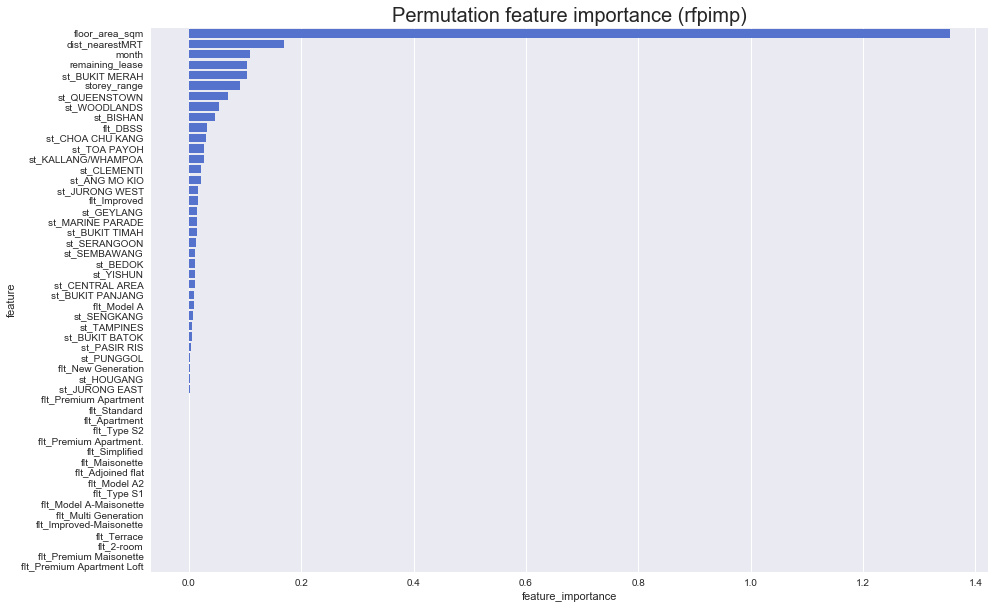

In [56]:
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

# plotting a feature importance dataframe (horizontal barchart)

def var_imp_plot(imp_df, title):
    imp_df = imp_df.reset_index()
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue').set_title(title, fontsize = 20)

var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [57]:
perm_imp_rfpimp

,Importance
Feature,
floor_area_sqm,1.354200e+00
dist_nearestMRT,1.690148e-01
month,1.098183e-01
remaining_lease,1.043538e-01
st_BUKIT MERAH,1.028499e-01
storey_range,9.188504e-02
st_QUEENSTOWN,7.048882e-02
st_WOODLANDS,5.462071e-02
st_BISHAN,4.592868e-02


In [58]:
#SKLEARN VAR IMPORTANCE

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

base_imp = imp_df(x_train.columns, RFR.feature_importances_)
base_imp

,feature,feature_importance
0,floor_area_sqm,4.961243e-01
1,storey_range,9.510602e-02
2,dist_nearestMRT,5.581614e-02
3,remaining_lease,5.060912e-02
4,st_BUKIT MERAH,4.249600e-02
5,month,3.066681e-02
6,st_QUEENSTOWN,2.696047e-02
7,st_BISHAN,2.213527e-02
8,flt_DBSS,2.040999e-02
9,st_WOODLANDS,1.842688e-02


In [59]:
x_test.head()

,floor_area_sqm,month,remaining_lease,storey_range,dist_nearestMRT,flt_2-room,flt_Adjoined flat,flt_Apartment,flt_DBSS,flt_Improved,...,st_PASIR RIS,st_PUNGGOL,st_QUEENSTOWN,st_SEMBAWANG,st_SENGKANG,st_SERANGOON,st_TAMPINES,st_TOA PAYOH,st_WOODLANDS,st_YISHUN
51472,-1.307113,-1.676358,-0.236838,0.639787,0.977207,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103548,0.650587,-0.376551,-1.073830,-0.030180,0.643589,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63445,0.038806,-1.485210,-0.825250,-1.370113,0.860349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40489,2.730645,1.382011,0.965159,-0.365163,0.803612,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60647,-1.307113,-1.523440,-0.148733,0.974770,0.229922,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [60]:
resaleflat.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,406,Improved,2 ROOM,44.0,1979,2017-01,61 years 04 months,232000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
1,108,New Generation,3 ROOM,67.0,1978,2017-01,60 years 07 months,250000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
2,602,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,262000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO
3,465,New Generation,3 ROOM,68.0,1980,2017-01,62 years 01 month,265000.0,04 TO 06,ANG MO KIO AVE 10,ANG MO KIO
4,601,New Generation,3 ROOM,67.0,1980,2017-01,62 years 05 months,265000.0,01 TO 03,ANG MO KIO AVE 5,ANG MO KIO


In [61]:
x_test.columns.values

array(['floor_area_sqm', 'month', 'remaining_lease', 'storey_range',
       'dist_nearestMRT', 'flt_2-room', 'flt_Adjoined flat',
       'flt_Apartment', 'flt_DBSS', 'flt_Improved',
       'flt_Improved-Maisonette', 'flt_Maisonette', 'flt_Model A',
       'flt_Model A-Maisonette', 'flt_Model A2', 'flt_Multi Generation',
       'flt_New Generation', 'flt_Premium Apartment',
       'flt_Premium Apartment Loft', 'flt_Premium Apartment.',
       'flt_Premium Maisonette', 'flt_Simplified', 'flt_Standard',
       'flt_Terrace', 'flt_Type S1', 'flt_Type S2', 'st_ANG MO KIO',
       'st_BEDOK', 'st_BISHAN', 'st_BUKIT BATOK', 'st_BUKIT MERAH',
       'st_BUKIT PANJANG', 'st_BUKIT TIMAH', 'st_CENTRAL AREA',
       'st_CHOA CHU KANG', 'st_CLEMENTI', 'st_GEYLANG', 'st_HOUGANG',
       'st_JURONG EAST', 'st_JURONG WEST', 'st_KALLANG/WHAMPOA',
       'st_MARINE PARADE', 'st_PASIR RIS', 'st_PUNGGOL', 'st_QUEENSTOWN',
       'st_SEMBAWANG', 'st_SENGKANG', 'st_SERANGOON', 'st_TAMPINES',
       'st_TOA 

In [62]:
resaleflat.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,139788.000000,139788.000000,1.397880e+05
mean,97.048536,1991.237145,4.473022e+05
std,24.518557,11.209949,1.385259e+05
min,31.000000,1966.000000,1.600000e+05
25%,74.000000,1984.000000,3.480000e+05
50%,96.000000,1989.000000,4.200000e+05
75%,112.000000,2000.000000,5.150000e+05
max,280.000000,2016.000000,1.200000e+06


In [63]:
#Mean, std of flat storeys for normalization
flat_storey

count    139788.000000
mean          6.090094
std           2.985223
min           2.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          27.000000
Name: storey_range, dtype: float64

In [64]:
#Mean, std of house sizes
stats.floor_area_sqm

count    139788.000000
mean         97.048536
std          24.518557
min          31.000000
25%          74.000000
50%          96.000000
75%         112.000000
max         280.000000
Name: floor_area_sqm, dtype: float64

In [65]:
serangoonpredict = pd.DataFrame(np.zeros((1,52), dtype=float, order='C'),columns=x_test.columns)
#Serangoon 5 room flat, 1302 sqft to 121 sqm
serangoonpredict['floor_area_sqm'] = 121
#serangoonpredict['lease_commence_date'] = 1989
serangoonpredict['remaining_lease'] = 99 - (2019-1989)
serangoonpredict['storey_range'] = 5
serangoonpredict['flt_Improved'] = 1
serangoonpredict['st_SERANGOON'] = 1
serangoonpredict['month'] = 2019
serangoonpredict['dist_nearestMRT'] = 0.4

#Normalize the month, floor area and remaining lease (timeframe)
serangoonpredict.month = (serangoonpredict.month - stats.month[1]) / stats.month[2]
serangoonpredict.floor_area_sqm = (serangoonpredict.floor_area_sqm - stats.floor_area_sqm[1]) / stats.floor_area_sqm[2]
serangoonpredict.remaining_lease = (serangoonpredict.remaining_lease - stats.remaining_lease[1]) / stats.remaining_lease[2]
serangoonpredict.storey_range = (serangoonpredict.storey_range - flat_storey[1]) / flat_storey[2]

In [66]:
serangoonpredict

,floor_area_sqm,month,remaining_lease,storey_range,dist_nearestMRT,flt_2-room,flt_Adjoined flat,flt_Apartment,flt_DBSS,flt_Improved,...,st_PASIR RIS,st_PUNGGOL,st_QUEENSTOWN,st_SEMBAWANG,st_SENGKANG,st_SERANGOON,st_TAMPINES,st_TOA PAYOH,st_WOODLANDS,st_YISHUN
0,0.976871,1.420241,0.999771,-0.365163,0.4,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0


In [67]:
RFR.predict(serangoonpredict)

array([706760.])

In [68]:
resaleflat[((resaleflat['street_name'] == 'SERANGOON CTRL') | (resaleflat['street_name'] == 'SERANGOON CTRL DR') | (resaleflat['street_name'] == 'LOR LEW LIAN')) & (resaleflat['flat_type'] == '5 ROOM')]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
3713,257,Improved,5 ROOM,115.0,1999,2017-03,81 years 03 months,735000.0,04 TO 06,SERANGOON CTRL DR,SERANGOON
5542,258,Improved,5 ROOM,115.0,1999,2017-04,81 years 01 month,750000.0,13 TO 15,SERANGOON CTRL DR,SERANGOON
7441,420,Improved,5 ROOM,121.0,1989,2017-05,71 years 06 months,750000.0,10 TO 12,SERANGOON CTRL,SERANGOON
7442,416,Improved,5 ROOM,121.0,1989,2017-05,71 years,768000.0,07 TO 09,SERANGOON CTRL,SERANGOON
7443,411,Improved,5 ROOM,132.0,1989,2017-05,70 years 11 months,662500.0,07 TO 09,SERANGOON CTRL,SERANGOON
10998,256,Improved,5 ROOM,115.0,1999,2017-07,80 years 10 months,750000.0,07 TO 09,SERANGOON CTRL DR,SERANGOON
12885,208,Improved,5 ROOM,122.0,1985,2017-08,67 years 03 months,670000.0,04 TO 06,SERANGOON CTRL,SERANGOON
14644,422,Improved,5 ROOM,121.0,1989,2017-09,70 years 07 months,740000.0,10 TO 12,SERANGOON CTRL,SERANGOON
14645,257,Improved,5 ROOM,115.0,1999,2017-09,80 years 08 months,760000.0,10 TO 12,SERANGOON CTRL DR,SERANGOON
16383,202,Improved,5 ROOM,122.0,1985,2017-10,67 years 02 months,700000.0,04 TO 06,SERANGOON CTRL,SERANGOON


In [69]:
resaleflat[((resaleflat['street_name'] == 'WOODLANDS RING RD')) & (resaleflat['flat_type'] == '5 ROOM')]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
1087,631,Improved,5 ROOM,122.0,1998,2017-01,80 years 07 months,430000.0,10 TO 12,WOODLANDS RING RD,WOODLANDS
1091,644,Improved,5 ROOM,121.0,1998,2017-01,80 years 06 months,440000.0,04 TO 06,WOODLANDS RING RD,WOODLANDS
2157,632,Improved,5 ROOM,121.0,1999,2017-02,81 years 07 months,420000.0,10 TO 12,WOODLANDS RING RD,WOODLANDS
4012,657,Improved,5 ROOM,122.0,1998,2017-03,80 years,431000.0,04 TO 06,WOODLANDS RING RD,WOODLANDS
5793,628A,Improved,5 ROOM,122.0,1998,2017-04,80 years 06 months,395000.0,01 TO 03,WOODLANDS RING RD,WOODLANDS
5800,628A,Improved,5 ROOM,122.0,1998,2017-04,80 years 06 months,400000.0,10 TO 12,WOODLANDS RING RD,WOODLANDS
5807,638,Improved,5 ROOM,120.0,1999,2017-04,81 years 03 months,410000.0,04 TO 06,WOODLANDS RING RD,WOODLANDS
5823,660,Improved,5 ROOM,122.0,1998,2017-04,79 years 10 months,458000.0,07 TO 09,WOODLANDS RING RD,WOODLANDS
7776,607,Improved,5 ROOM,122.0,1998,2017-05,79 years 11 months,400000.0,04 TO 06,WOODLANDS RING RD,WOODLANDS
7777,659,Improved,5 ROOM,121.0,1998,2017-05,79 years 09 months,420000.0,07 TO 09,WOODLANDS RING RD,WOODLANDS


In [70]:
woodlandspredict = pd.DataFrame(np.zeros((1,52), dtype=float, order='C'),columns=x_test.columns)
#woodlands 5 room flat, 1302 sqft to 121 sqm
woodlandspredict['floor_area_sqm'] = 122
#woodlandspredict['lease_commence_date'] = 2007
woodlandspredict['remaining_lease'] = 99 - (2019-1998)
woodlandspredict['storey_range'] = 8
woodlandspredict['flt_Improved'] = 1
woodlandspredict['st_WOODLANDS'] = 1
woodlandspredict['month'] = 2019
woodlandspredict['dist_nearestMRT'] = 1

#Normalize the month, floor area and remaining lease (timeframe)
woodlandspredict.month = (woodlandspredict.month - stats.month[1]) / stats.month[2]
woodlandspredict.floor_area_sqm = (woodlandspredict.floor_area_sqm - stats.floor_area_sqm[1]) / stats.floor_area_sqm[2]
woodlandspredict.remaining_lease = (woodlandspredict.remaining_lease - stats.remaining_lease[1]) / stats.remaining_lease[2]
woodlandspredict.storey_range = (woodlandspredict.storey_range - flat_storey[1]) / flat_storey[2]

In [71]:
RFR.predict(woodlandspredict)

array([403586.32])